# ENTREGABLE 1

INSTRUCCIONES

Realizar la primera fase del análisis exploratorio (limpieza) usando el archivo CSV (dataset_banco.csv) con 45215 filas y 17 columnas.

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Una primera mirada al dataset

In [29]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [30]:
# Lectura
from google.colab import drive
drive.mount('/gdrive')

ruta = "/content/dataset_banco (1).csv"
data = pd.read_csv(ruta)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [31]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [32]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [33]:
df_limpio= data.dropna()
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [34]:
# Obtener los valores únicos en la columna "job"
unique_job_values = df_limpio['job'].unique()

# Imprimir los valores únicos en la columna "job"
print("Valores únicos en la columna 'job':")
print(unique_job_values)


Valores únicos en la columna 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'Management' 'retired' 'admin.' 'services' 'self-employed' 'MANAGEMENT'
 'Self-employed' 'unemployed' 'housemaid' 'student' 'Services' 'Retired'
 'administrative']


##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

In [35]:
# Verificar si hay más de un valor único en cada columna
for column in df_limpio.columns:
    unique_values = df_limpio[column].nunique()
    if unique_values > 1:
        print(f"La columna '{column}' tiene más de un valor único.")
    else:
        print(f"La columna '{column}' tiene solo un valor único.")

La columna 'age' tiene más de un valor único.
La columna 'job' tiene más de un valor único.
La columna 'marital' tiene más de un valor único.
La columna 'education' tiene más de un valor único.
La columna 'default' tiene más de un valor único.
La columna 'balance' tiene más de un valor único.
La columna 'housing' tiene más de un valor único.
La columna 'loan' tiene más de un valor único.
La columna 'contact' tiene más de un valor único.
La columna 'day' tiene más de un valor único.
La columna 'month' tiene más de un valor único.
La columna 'duration' tiene más de un valor único.
La columna 'campaign' tiene más de un valor único.
La columna 'pdays' tiene más de un valor único.
La columna 'previous' tiene más de un valor único.
La columna 'poutcome' tiene más de un valor único.
La columna 'y' tiene más de un valor único.


##4.3 Filas repetidas

In [36]:
# Verificar filas duplicadas
duplicated_rows = df_limpio[df_limpio.duplicated()]
if not duplicated_rows.empty:
    print("Se encontraron filas duplicadas:")
    print(duplicated_rows)
else:
    print("No se encontraron filas duplicadas.")

Se encontraron filas duplicadas:
       age          job   marital  education default  balance housing loan  \
1201    43  blue-collar   married  secondary     yes     -7.0      no   no   
36438   29   technician    single   tertiary      no  18254.0      no   no   
45197   59   management   married   tertiary      no    138.0     yes  yes   
45203   52   technician  divorced  secondary      no   1005.0     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome    y  
1201    unknown    8   may      70.0         1   -1.0         0  unknown   no  
36438  cellular   11   may     279.0         2   -1.0         0  unknown   no  
45197  cellular   16   nov     162.0         2  187.0         5  failure   no  
45203  cellular    2   jun     195.0         1   -1.0         0  unknown  yes  


In [37]:
# Eliminar filas duplicadas
df_limpio_sin_duplicados = df_limpio.drop_duplicates()
df_limpio_sin_duplicados.info()
# Reiniciar el índice sin conservar el índice original
df_limpio_sin_duplicados.reset_index(drop=True, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45203 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45203 non-null  int64  
 1   job        45203 non-null  object 
 2   marital    45203 non-null  object 
 3   education  45203 non-null  object 
 4   default    45203 non-null  object 
 5   balance    45203 non-null  float64
 6   housing    45203 non-null  object 
 7   loan       45203 non-null  object 
 8   contact    45203 non-null  object 
 9   day        45203 non-null  int64  
 10  month      45203 non-null  object 
 11  duration   45203 non-null  float64
 12  campaign   45203 non-null  int64  
 13  pdays      45203 non-null  float64
 14  previous   45203 non-null  int64  
 15  poutcome   45203 non-null  object 
 16  y          45203 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.


In [38]:
df_limpio_sin_duplicados.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000
mean,41.005177,1373.893967,15.807115,258.039754,2.763843,40.177709,0.580138
std,12.037387,3923.852086,8.323018,257.470045,3.098168,100.104768,2.303344
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


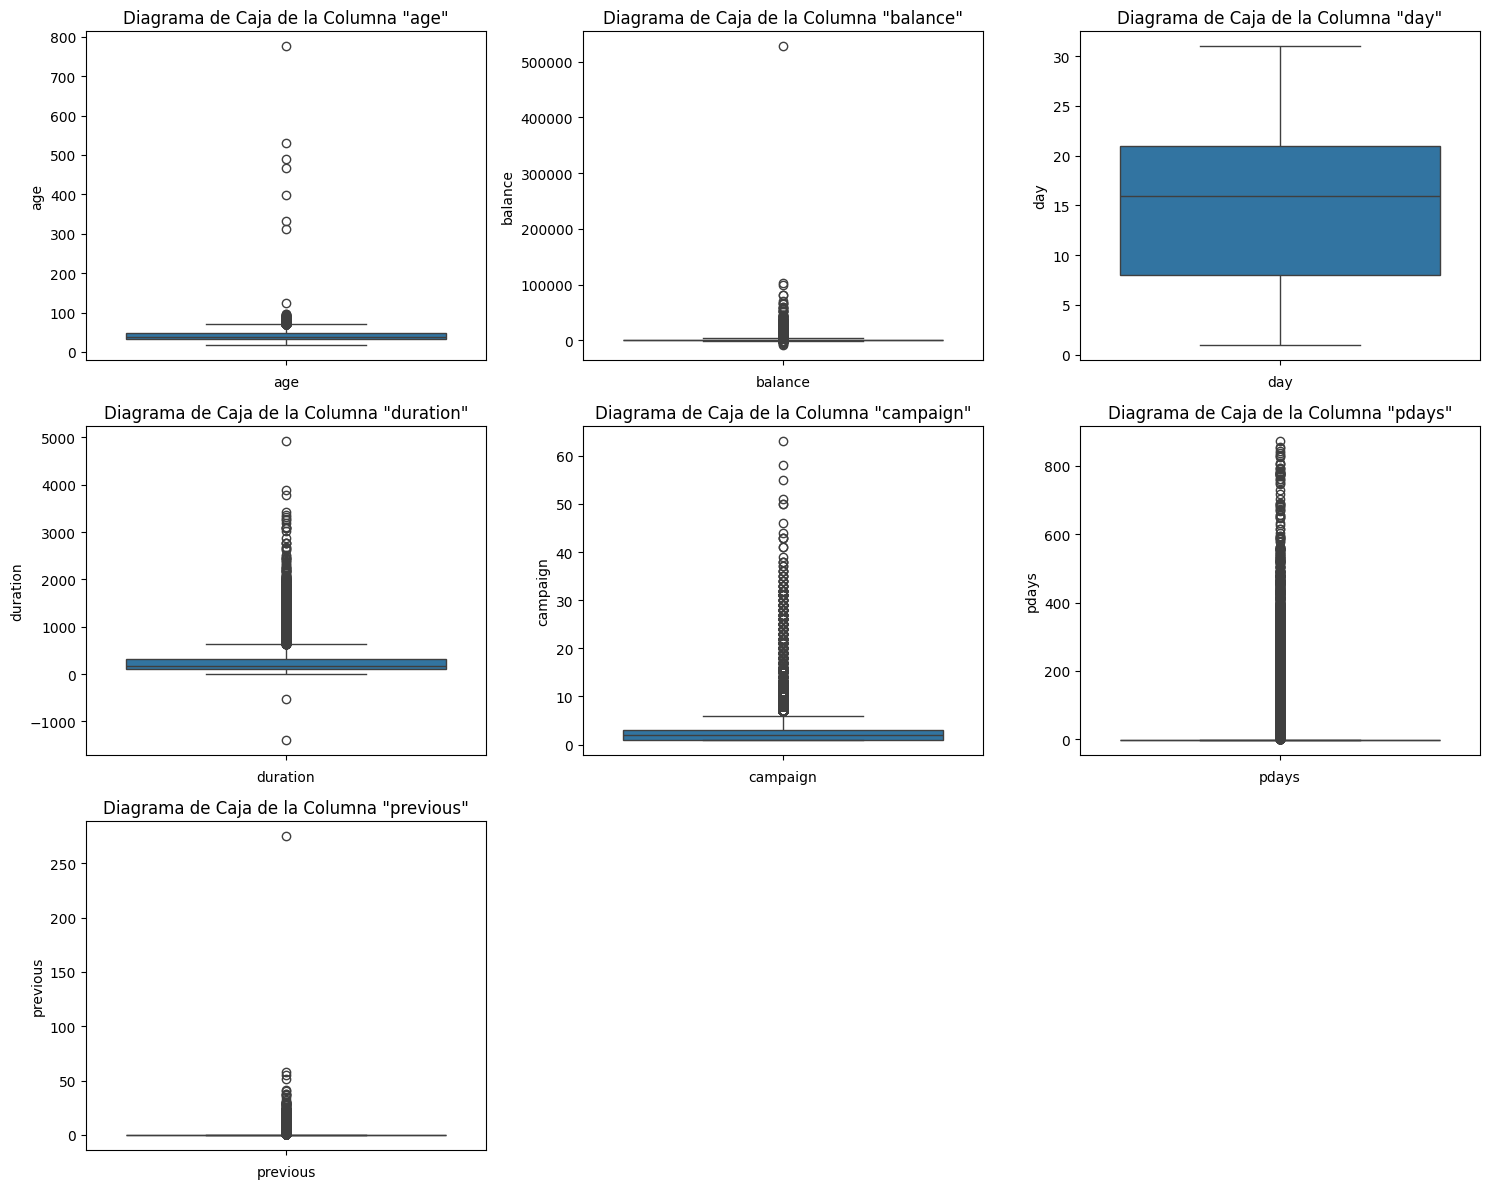

In [39]:
#GRAFICO OUTLIERS PARA VARIABLES NUMERICAS

# Seleccionar solo las columnas numéricas
df_numeric = df_limpio_sin_duplicados.select_dtypes(include=['number'])

# Calcular el número de filas y columnas necesarias para la disposición de los subgráficos
num_rows = len(df_numeric.columns) // 3 + (len(df_numeric.columns) % 3 > 0)  # Asegura que haya al menos una fila
num_cols = min(len(df_numeric.columns), 3)

# Crear la figura y los ejes de los subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*4))  # Tamaño ajustable según la cantidad de columnas

# Iterar sobre las columnas numéricas y trazar los diagramas de caja en los subgráficos correspondientes
for i, column in enumerate(df_numeric.columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=df_numeric[column], ax=axes[row, col])
    axes[row, col].set_title(f'Diagrama de Caja de la Columna "{column}"')
    axes[row, col].set_xlabel(column)

# Ocultar los subgráficos que no se utilizaron
for i in range(len(df_numeric.columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Ajustar el espaciado entre subgráficos y mostrar la figura
plt.tight_layout()
plt.show()



Observaciones:
"age": existen sujetos con edad mayor a 100 años
"duration": hay valores negativos de duración de llamada
"previous": existe un valor demasiado alto de 300

In [40]:
#Eliminacion age mayores de 100
df_limpio_sin_duplicados = df_limpio_sin_duplicados[df_limpio_sin_duplicados["age"]<=100]
df_limpio_sin_duplicados.shape

(45195, 17)

In [41]:
#Eliminacion duration valores negativos
df_limpio_sin_duplicados = df_limpio_sin_duplicados[df_limpio_sin_duplicados["duration"]>0]
df_limpio_sin_duplicados.shape

(45190, 17)

In [42]:
#Eliminacion previous mas de 100 llamadas a la persona
df_limpio_sin_duplicados = df_limpio_sin_duplicados[df_limpio_sin_duplicados["previous"]<=100]
df_limpio_sin_duplicados.shape

(45189, 17)

<ipython-input-43-cb12b46eb564>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_categorical, x=column, palette="Set3", ax=axes[row, col])
<ipython-input-43-cb12b46eb564>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_categorical, x=column, palette="Set3", ax=axes[row, col])
<ipython-input-43-cb12b46eb564>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_categorical, x=column, palette="Set3", ax=axes[row, col])
<ipython-input-43-cb12b46eb564>:17: FutureWarning: 

Passing `palette` without assigning `hue` is

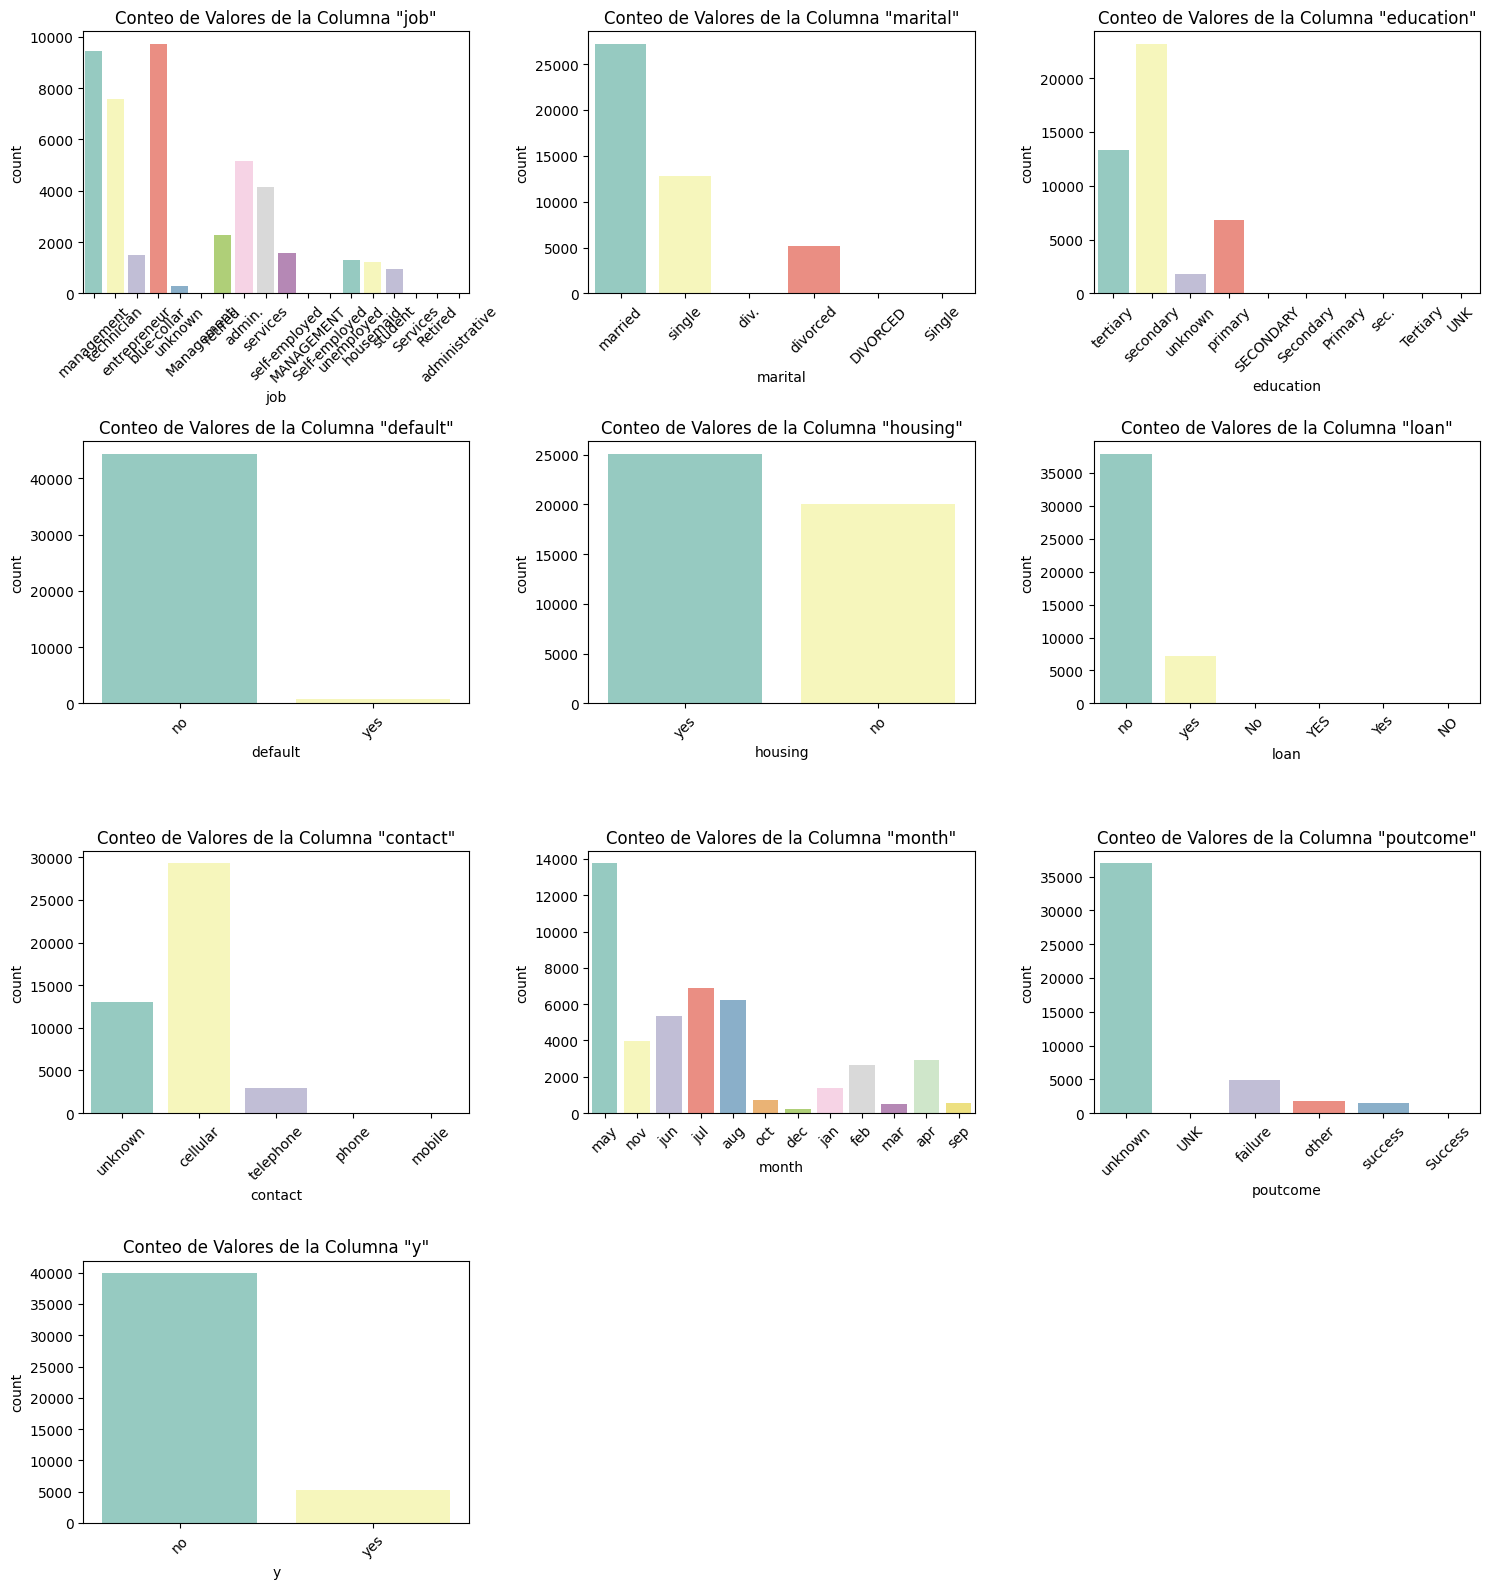

In [43]:
#GRAFICO DE VARIABLES CATEGORICAS

# Seleccionar solo las columnas categóricas
df_categorical = df_limpio_sin_duplicados.select_dtypes(include=['object'])

# Calcular el número de filas y columnas necesarias para la disposición de los subgráficos
num_rows = len(df_categorical.columns) // 3 + (len(df_categorical.columns) % 3 > 0)  # Asegura que haya al menos una fila
num_cols = min(len(df_categorical.columns), 3)

# Crear la figura y los ejes de los subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*4))  # Tamaño ajustable según la cantidad de columnas

# Iterar sobre las columnas categóricas y trazar los diagramas de conteo en los subgráficos correspondientes
for i, column in enumerate(df_categorical.columns):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(data=df_categorical, x=column, palette="Set3", ax=axes[row, col])
    axes[row, col].set_title(f'Conteo de Valores de la Columna "{column}"')
    axes[row, col].set_xlabel(column)
    axes[row, col].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad

# Ocultar los subgráficos que no se utilizaron
for i in range(len(df_categorical.columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Ajustar el espaciado entre subgráficos y mostrar la figura
plt.tight_layout()
plt.show()


##4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

In [44]:
# Reemplazar nombres mal escritos en la columna "job" en el DataFrame final
df_limpio_sin_duplicados['job'] = df_limpio_sin_duplicados['job'].replace({'Management': 'management', 'MANAGEMENT': 'management', 'admin.': 'administrative', 'Retired': 'retired', 'Services': 'services', 'Self-employed': 'self-employed'})

# Mostrar el DataFrame resultante
print(df_limpio_sin_duplicados['job'].unique())


['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [45]:
# Reemplazar nombres mal escritos en la columna "marital" en el DataFrame final
df_limpio_sin_duplicados['marital'] = df_limpio_sin_duplicados['marital'].replace({'Single': 'single', 'DIVORCED': 'divorced', 'div.': 'divorced'})

# Mostrar el DataFrame resultante
print(df_limpio_sin_duplicados['marital'].unique())

['married' 'single' 'divorced']


In [46]:
df_limpio_sin_duplicados['education'] = df_limpio_sin_duplicados['education'].replace({'Tertiary': 'tertiary', 'Secondary': 'secondary', 'SECONDARY': 'secondary', 'sec.': 'secondary', 'Primary': 'primary', 'UNK': 'unknown'})

# Mostrar el DataFrame resultante
print(df_limpio_sin_duplicados['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary']


In [47]:
df_limpio_sin_duplicados['loan'] = df_limpio_sin_duplicados['loan'].replace({'NO': 'no', 'No': 'no', 'YES': 'yes', 'Yes': 'yes'})

# Mostrar el DataFrame resultante
print(df_limpio_sin_duplicados['loan'].unique())

['no' 'yes']


In [48]:
df_limpio_sin_duplicados['contact'] = df_limpio_sin_duplicados['contact'].replace({'cellular': 'mobile', 'telephone': 'phone'})

# Mostrar el DataFrame resultante
print(df_limpio_sin_duplicados['contact'].unique())

['unknown' 'mobile' 'phone']


In [49]:
df_limpio_sin_duplicados['poutcome'] = df_limpio_sin_duplicados['poutcome'].replace({'UNK': 'unknown', 'Success': 'success'})

# Mostrar el DataFrame resultante
print(df_limpio_sin_duplicados['poutcome'].unique())

['unknown' 'failure' 'other' 'success']


## Conclusiones

In [50]:
data.to_csv(ruta, index=False)

*   Al revisar la base de datos, se pudo observar que tenía 7 filas duplicadas, valores nulos, además que tenía mala escritura en ciertos campos lo que duplicaba valores. Obtiendo como resultado numero final de 45189 filas y 17 columnas
*   Después de entender el estudio de negocio y con el objetivo de lograr conocer a qué personas se les ofrece el crédito, no se elimina ninguna columna de información ya que circunstancialmente pueden aportar al análisis.
*   En cuanto a outliers, se ha eliminado "age": ya que existen sujetos con edad mayor a 100 años,
"duration": ya que hay valores negativos de duración de llamada y "previous": ya que existe un valor demasiado alto de 300
*   Finalmente, se realizó gráficos de barras a las variables categóricas para poder entender mejor la población a la que nos dirigimos. La cual podríamos optimizar columnas de información, unificando la información crediticia.






